In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cal = pd.read_csv('calories.csv')
ex = pd.read_csv('exercise.csv')

In [5]:
cal.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
cal.shape

(15000, 2)

In [11]:
ex.shape

(15000, 8)

In [13]:
cal_ex = pd.merge(ex, cal, how='left')

In [15]:
cal_ex.shape

(15000, 9)

In [17]:
cal_ex.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [19]:
cal_ex.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [21]:
cal_ex.replace({'male': 0, 'female' :1}, inplace=True)
cal_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


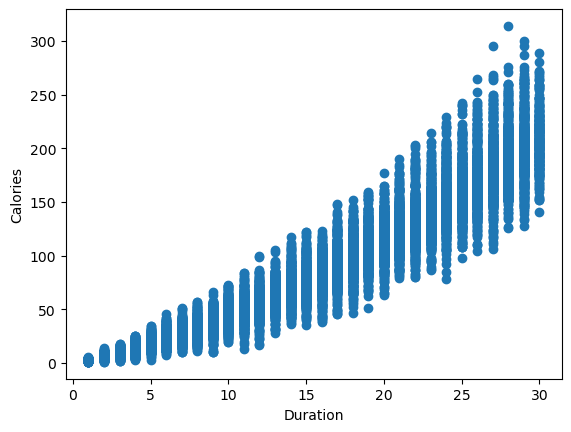

In [23]:
plt.scatter(cal_ex['Duration'], cal_ex['Calories'])
plt.ylabel('Calories')
plt.xlabel('Duration');

In [25]:
cal_ex['Duration'].max()

30.0

In [27]:
cal_ex.groupby('Duration')['Calories'].describe()

,count,mean,std,min,25%,50%,75%,max
Duration,,,,,,,,
1.0,230.0,3.317391,0.997443,1.0,3.0,3.0,4.00,6.0
2.0,479.0,6.972860,1.891761,1.0,6.0,7.0,8.00,14.0
3.0,511.0,10.906067,2.747366,2.0,9.0,11.0,13.00,18.0
4.0,509.0,14.707269,3.908748,3.0,12.0,15.0,17.00,25.0
5.0,533.0,19.515947,4.617129,3.0,17.0,20.0,22.00,34.0
6.0,533.0,24.257036,5.865309,7.0,21.0,25.0,28.00,46.0
7.0,482.0,29.002075,6.620858,10.0,25.0,29.0,33.00,51.0
8.0,541.0,33.765250,7.709925,11.0,29.0,34.0,39.00,57.0
9.0,517.0,38.980658,8.432105,10.0,34.0,40.0,44.00,66.0


In [29]:
cal_ex.groupby('Gender')['Calories'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,7447.0,90.945750,66.125478,1.0,34.0,78.0,140.0,314.0
1,7553.0,88.153052,58.586980,2.0,36.0,80.0,135.0,240.0


In [31]:
cal_ex.loc[cal_ex['Calories'].max()]

User_ID       15422663.0
Gender               1.0
Age                 53.0
Height             168.0
Weight              69.0
Duration            11.0
Heart_Rate          89.0
Body_Temp           40.0
Calories            51.0
Name: 314, dtype: float64

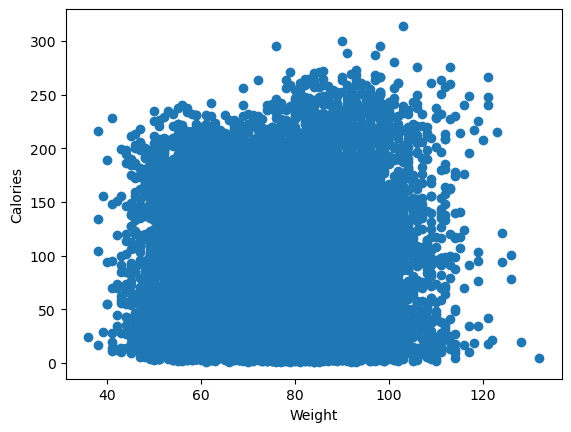

In [33]:
plt.scatter(cal_ex['Weight'], cal_ex['Calories'])
plt.xlabel('Weight')
plt.ylabel('Calories');

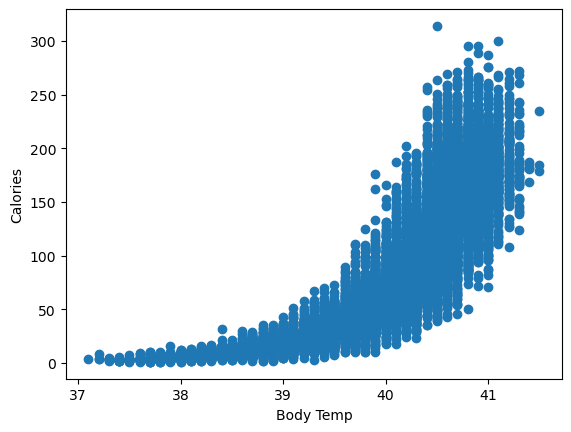

In [35]:
plt.scatter(cal_ex['Body_Temp'], cal_ex['Calories'])
plt.ylabel('Calories')
plt.xlabel('Body Temp');

In [47]:
cal_ex.sort_values(['Body_Temp', 'Calories'], ascending=False).head(30)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
7869,13715750,0,71,193.0,100.0,29.0,104.0,41.5,235.0
11290,19586924,1,28,175.0,66.0,30.0,107.0,41.5,184.0
1112,12917234,1,23,166.0,65.0,29.0,108.0,41.5,179.0
6054,11343139,1,50,159.0,57.0,28.0,107.0,41.4,187.0
137,14117537,0,42,185.0,78.0,26.0,110.0,41.4,185.0
7574,19281057,1,33,161.0,56.0,28.0,108.0,41.4,182.0
12515,15205594,0,73,170.0,78.0,25.0,101.0,41.4,182.0
11572,18407550,0,40,182.0,81.0,30.0,103.0,41.4,181.0
1077,14662485,1,30,168.0,61.0,28.0,105.0,41.4,169.0
6979,17455639,0,57,180.0,86.0,30.0,117.0,41.3,272.0


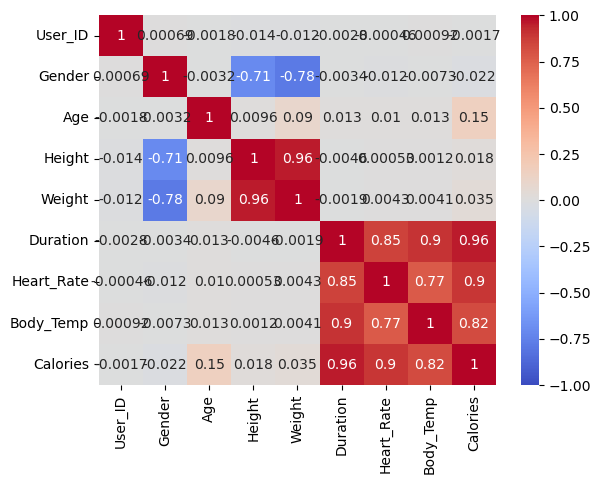

In [53]:
sns.heatmap(cal_ex.corr(), cmap='coolwarm', vmin=-1, annot=True);

In [55]:
cal_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [57]:
cal_ex.to_csv('cal_ex.csv', index=False)

In [60]:
pd.read_csv('cal_ex.csv')

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0
